# Solo Mode Behavioral Analysis

This notebook performs exploratory data analysis (EDA) of Solo mode player statistics.

Goals:
- Ensure statistical stability of data
- Construct behavior-based features
- Examine distributions
- Investigate correlations
- Prepare data for PCA and clustering

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams.update({
    "font.family": "Times New Roman",
    "font.size": 11,
    "axes.titlesize": 14,
    "axes.titleweight": "bold",
    "axes.labelsize": 12,
    "axes.labelweight": "bold",
})

In [23]:
df = pd.read_csv("../data/Fortnite_players_stats.csv")

df.shape

(1435, 37)

We begin by inspecting the size of the dataset.

In [24]:
df = df[df["Solo matches"] >= 50].copy()

df.shape

(1433, 37)

Players with fewer than 50 solo matches are excluded to ensure stability of performance metrics.

In [25]:
df["solo_kpm"] = df["Solo kills"] / df["Solo matches"]
df["solo_mpm"] = df["Solo minutesPlayed"] / df["Solo matches"]
df["solo_wr"]  = df["Solo top1"] / df["Solo matches"]

In [26]:
df[["Solo kd", "solo_kpm", "solo_mpm", "solo_wr"]].head()

,Solo kd,solo_kpm,solo_mpm,solo_wr
0,4.37,3.579113,8.018621,0.180099
1,8.71,6.170707,2.188757,0.291215
2,9.60,6.337559,9.057755,0.339709
3,0.84,0.815026,8.802007,0.032818
4,6.32,4.423346,8.183563,0.299616


We convert raw counts into relative metrics to remove the influence of total play volume.

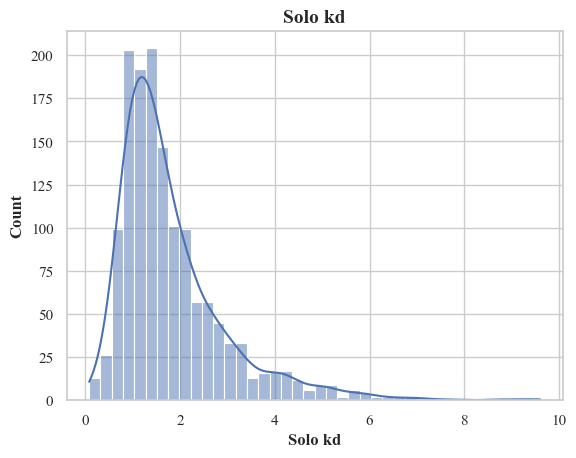

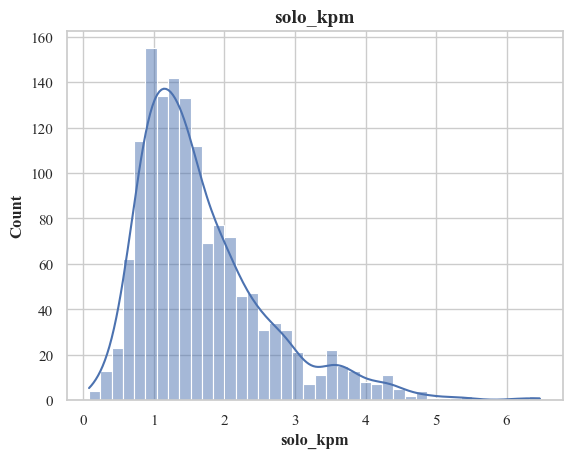

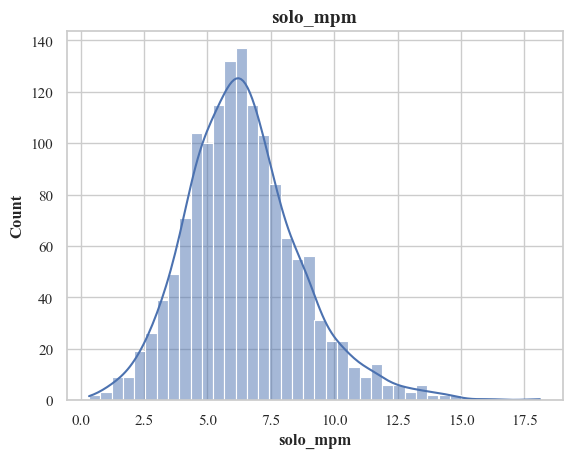

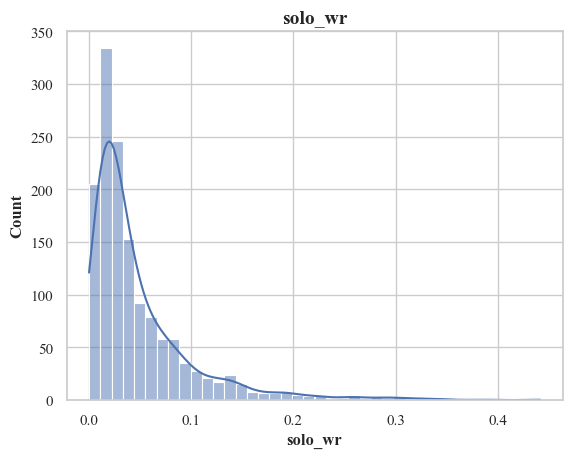

In [27]:
features = ["Solo kd", "solo_kpm", "solo_mpm", "solo_wr"]

for col in features:
    plt.figure()
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(col)
    plt.show()

We inspect skewness and dispersion of behavioral metrics.

In [28]:
df[features].describe()

,Solo kd,solo_kpm,solo_mpm,solo_wr
count,1433.000000,1433.000000,1433.000000,1433.000000
mean,1.816657,1.675884,6.412964,0.048506
std,1.156624,0.914052,2.258459,0.053266
min,0.080000,0.080374,0.329978,0.000000
25%,1.050000,1.027273,4.897989,0.015985
50%,1.480000,1.439658,6.247688,0.029391
75%,2.200000,2.067577,7.610574,0.061224
max,9.600000,6.473173,18.111517,0.441275


In [29]:
df[features].skew()

Solo kd     2.021605
solo_kpm    1.422028
solo_mpm    0.645036
solo_wr     2.629474
dtype: float64

We compute summary statistics and skewness to assess distribution shape.

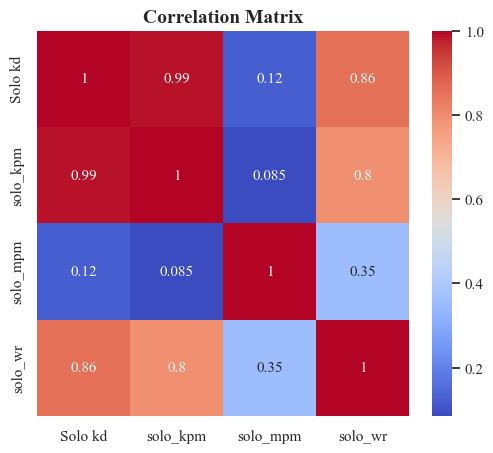

In [30]:
plt.figure(figsize=(6,5))
sns.heatmap(df[features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

Correlation analysis reveals relationships between behavioral metrics.
Strong correlations justify dimensionality reduction.

## Preliminary Findings

1. Behavioral metrics are moderately correlated.
2. Relative features successfully remove raw volume effects.
3. Distribution skewness will be addressed through standardization.
4. Data is suitable for PCA and clustering.

Next step: Standardization and dimensionality reduction.